In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import manifold
from sklearn.preprocessing import normalize
import seaborn as sns
from math import pi
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
kwargs = {'levels': np.arange(0, 1, 0.01)}

/home/xyli/.conda/envs/mmrec/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
#对得到的特征进行降维
light_emb = np.load("./LightGCN_item_embedding_clothing.npy")
light_emb_pca = tsne.fit_transform(light_emb)
light_emb_norm = normalize(light_emb_pca, axis=1, norm='l2')

ours_emb = np.load("./MMDenoise_item_embedding_clothing.npy")
ours_emb_pca = tsne.fit_transform(ours_emb)
ours_emb_norm = normalize(ours_emb_pca, axis=1, norm='l2')

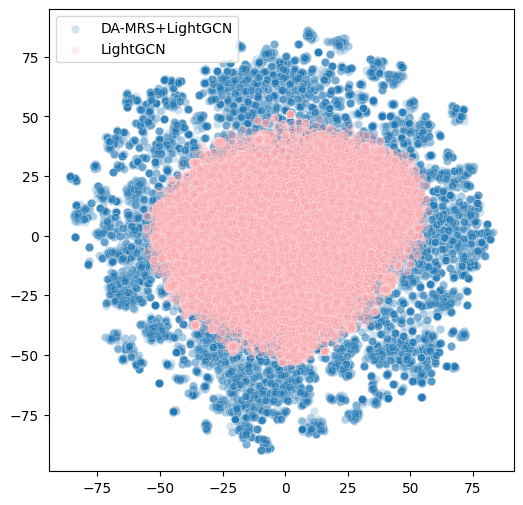

In [73]:
f, axs =plt.subplots(1,1, figsize=(6, 6))
scatter1 = sns.scatterplot(x=ours_emb_pca[:,0], y=ours_emb_pca[:,1],ax=axs, alpha=1/5,label='DA-MRS+LightGCN')
scatter2 = sns.scatterplot(x=light_emb_pca[:,0], y=light_emb_pca[:,1],ax=axs, color=sns.color_palette([(254/255, 168/255, 174/255)], 1), alpha=1/5, label='LightGCN')
axs.legend()
plt.savefig('../save/clothing_compare_embedding.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

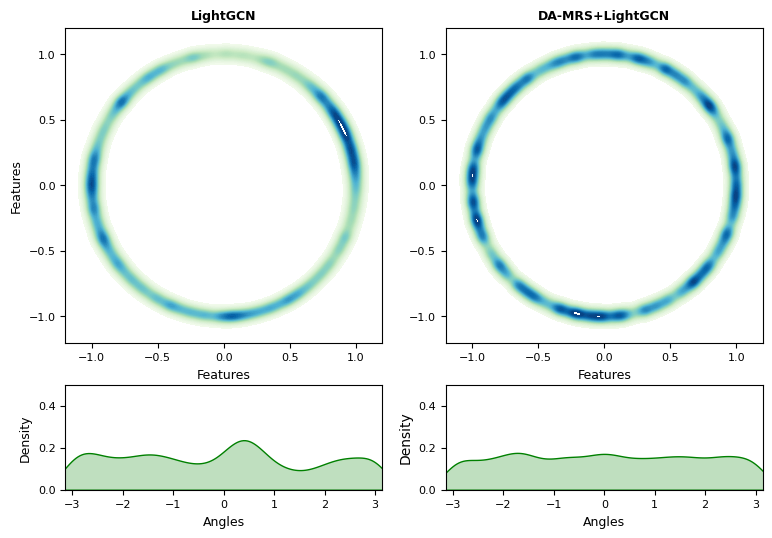

In [74]:
f, axs =plt.subplots(2,2, figsize=(9, 6), gridspec_kw={'height_ratios': [3, 1]})

sns.kdeplot(x=light_emb_norm[:,0],y=light_emb_norm[:,1],bw=0.05, cmap="GnBu",shade=True, legend=True, ax=axs[0][0], **kwargs)
axs[0][0].set_title('LightGCN', fontsize=9, fontweight="bold")
x = [p[0] for p in light_emb_norm]
y = [p[1] for p in light_emb_norm]
angles = np.arctan2(y, x)
sns.kdeplot(data=angles, bw=0.15, shade=True, legend=True, ax=axs[1][0], color='green')

sns.kdeplot(x=ours_emb_norm[:,0],y=ours_emb_norm[:,1],bw=0.05, cmap="GnBu", shade=True, legend=True, ax=axs[0][1], **kwargs)
axs[0][1].set_title('DA-MRS+LightGCN', fontsize=9, fontweight="bold")
x = [p[0] for p in ours_emb_norm]
y = [p[1] for p in ours_emb_norm]
angles = np.arctan2(y, x)
sns.kdeplot(data=angles, bw=0.15, shade=True, legend=True, ax=axs[1][1], color='green')

for ax in axs[0]:
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.patch.set_facecolor('white')
    ax.collections[0].set_alpha(0)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('Features', fontsize=9)
axs[0][0].set_ylabel('Features', fontsize=9)

for ax in axs[1]:
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('Angles', fontsize=9)
    ax.set_ylim(0, 0.5)
    ax.set_xlim(-pi, pi)
axs[1][0].set_ylabel('Density', fontsize=9)

plt.savefig('../save/clothing_cmp_distribution.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()